In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('~/thinkful_mac/thinkful_large_files/Melbourne_housing_extra_data.csv')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944


In [5]:
#Drop obs where we don't know the price
df.dropna(subset = ['Price'], inplace = True)

#Drop address (doesn't make sense to include in model), Postcode (model will try to use it as a continuous variable, right?)
#Lat & Long also contain most of the info as Postalcode anyway. 


#Replace 0's in Landsize with NaN (drop?), and same with BuildingArea
df['Landsize'].replace(0, np.nan, inplace = True)
df['BuildingArea'].replace(0, np.nan, inplace = True)


print(len(df))

9421


In [8]:
#Is there any way around dropping NaNs?
df.dropna(subset = ['Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Car', 'Rooms'], inplace = True)
print(len(df))

3366


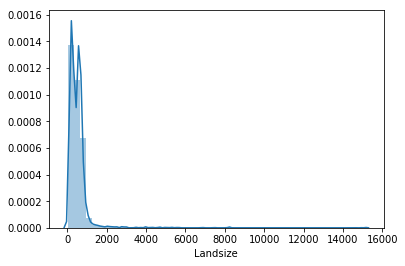

In [9]:
sns.distplot(df['Landsize'])

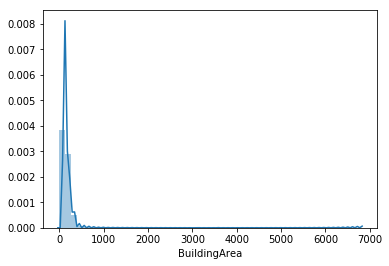

In [10]:
sns.distplot(df['BuildingArea'])

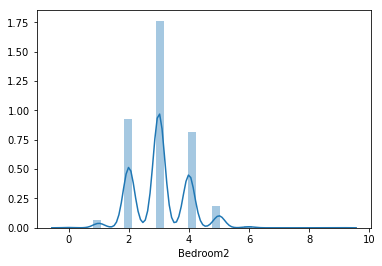

In [11]:
sns.distplot(df['Bedroom2'])

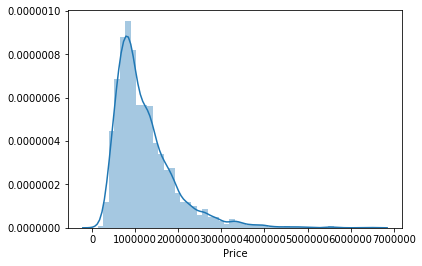

In [12]:
sns.distplot(df['Price'])

In [13]:
#Linear Model: select subset of vars which seem like they would contribute to explanatory power of model

df2 = pd.DataFrame()
df2['Suburb'] = df['Suburb']
df2['Type'] = df['Type']
df2['Bedrooms'] = df['Bedroom2']
df2['Bathrooms'] = df['Bathroom']
df2['Distance'] = df['Distance']
df2['Latitude'] = df['Lattitude']
df2['Longitude'] = df['Longtitude']
df2['Landsize'] = df['Landsize']
df2['BuildingArea'] = df['BuildingArea']
df2['Car'] = df['Car']
df2['Price'] = df['Price']

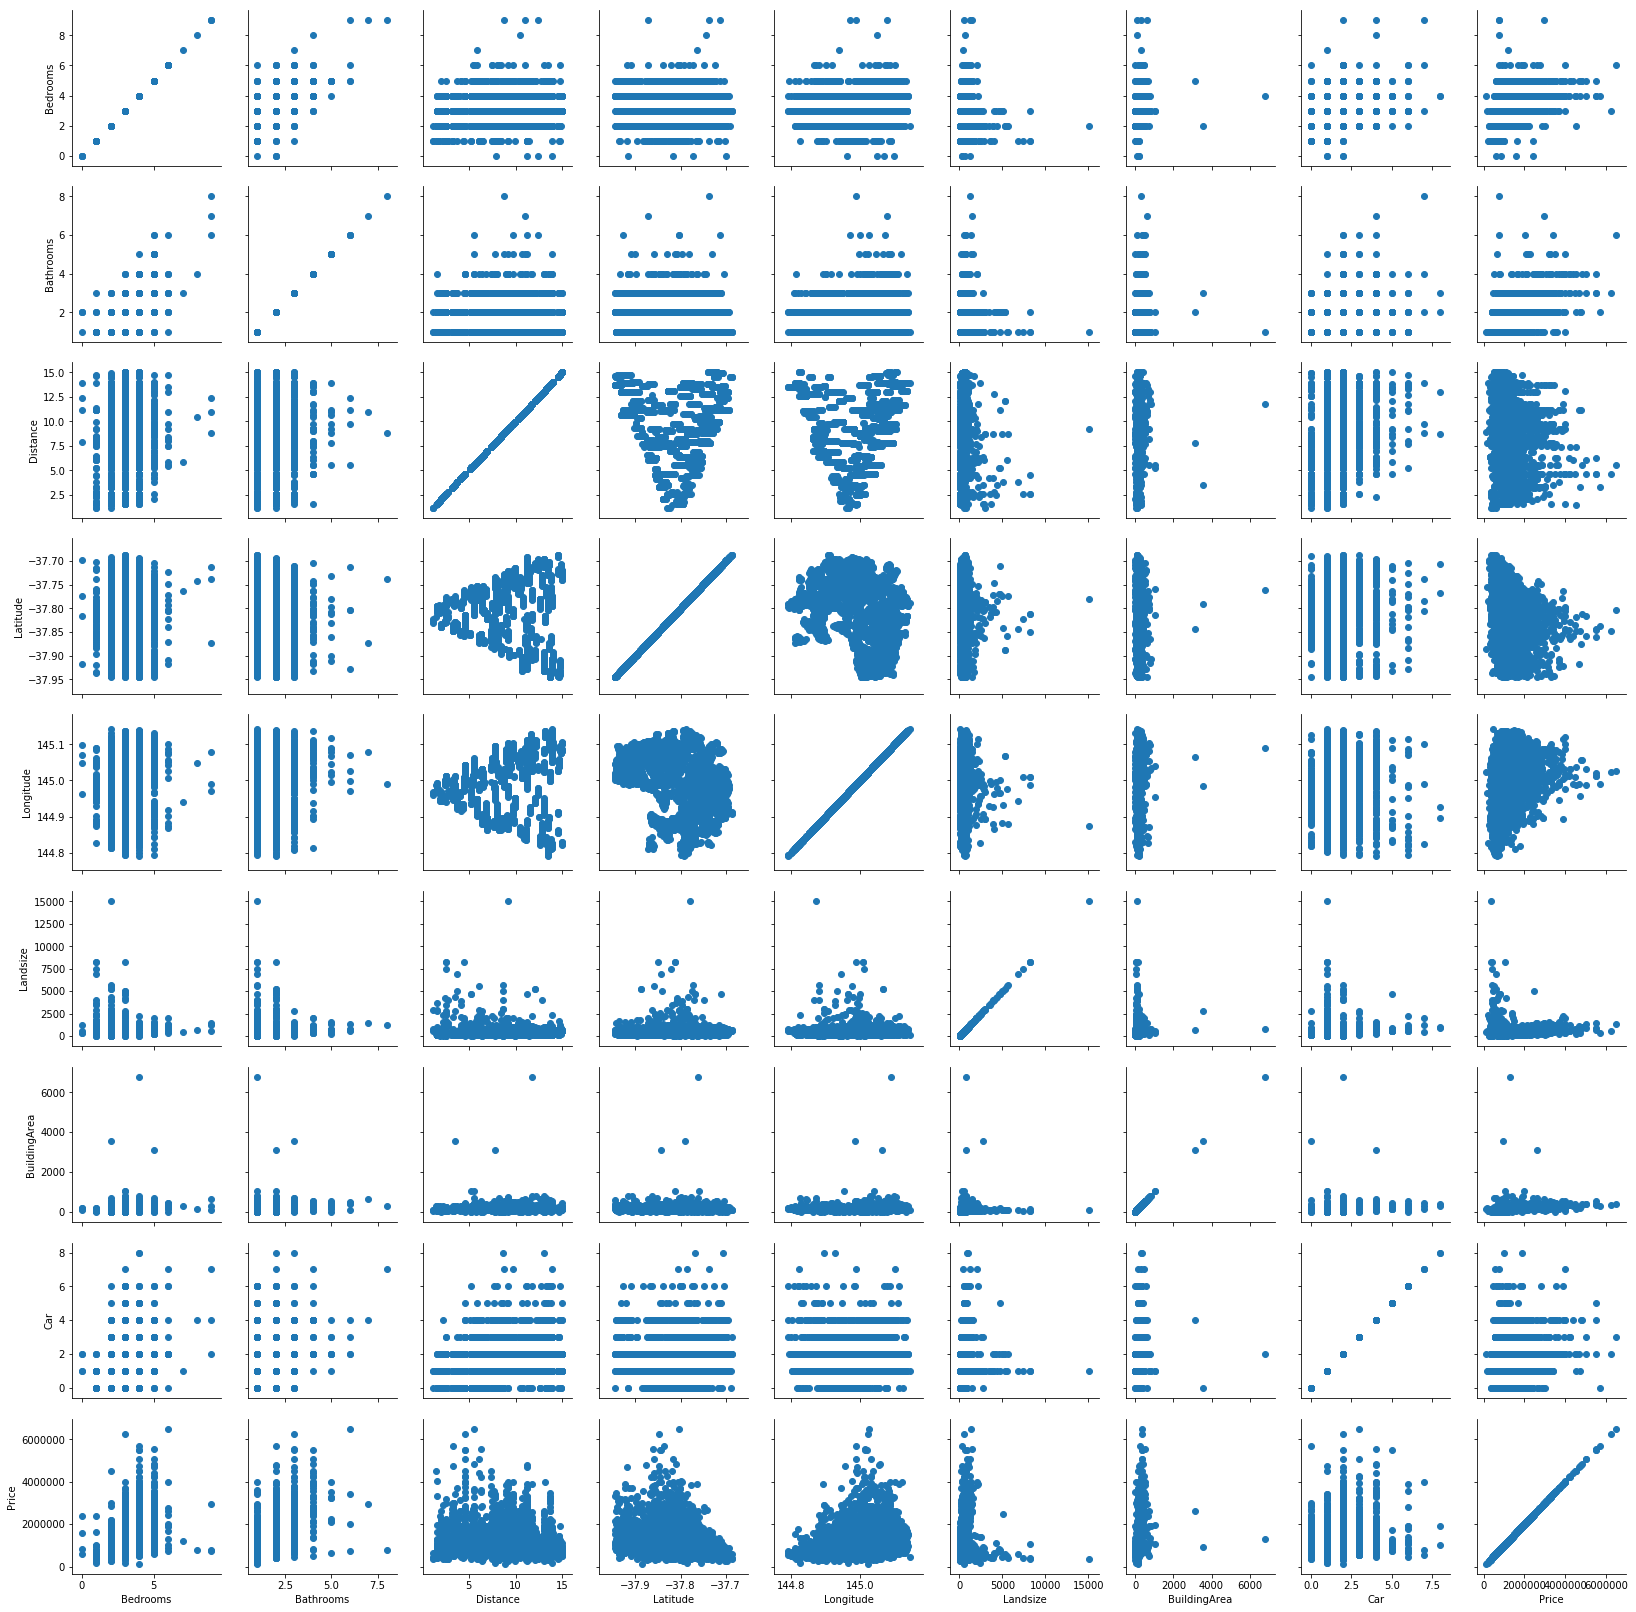

In [14]:
g = sns.PairGrid(df2)
g = g.map(plt.scatter)

In [15]:
#Fit the linear model on data as-is

from scipy.stats import f
import statsmodels.formula.api as smf


# Write out the model formula.
# Use a ~ to represent an '=' from the functional form
#linear_formula = 'Price ~ Suburb + Type + Bedrooms + Bathrooms + Distance + Latitude + Longitude + Landsize + BuildingArea + Car'

linear_formula = 'Price ~ Suburb + Type + Bedrooms + Bathrooms + Latitude + Longitude + Landsize + BuildingArea + Car + Distance'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df2).fit()

In [16]:
lm.params

Intercept                       5.033309e+07
Suburb[T.Aberfeldie]            1.985189e+05
Suburb[T.Airport West]         -1.706744e+05
Suburb[T.Albert Park]           6.094857e+05
Suburb[T.Albion]               -5.312141e+05
Suburb[T.Alphington]            3.442713e+05
Suburb[T.Altona]               -5.949142e+05
Suburb[T.Altona North]         -8.069256e+05
Suburb[T.Armadale]              6.812475e+05
Suburb[T.Ascot Vale]           -1.704676e+05
Suburb[T.Ashburton]             1.496071e+05
Suburb[T.Ashwood]              -1.126975e+05
Suburb[T.Avondale Heights]     -5.160227e+05
Suburb[T.Balaclava]            -5.345109e+04
Suburb[T.Balwyn]                6.804378e+05
Suburb[T.Balwyn North]          5.561463e+05
Suburb[T.Bellfield]            -2.804753e+05
Suburb[T.Bentleigh]            -2.415320e+05
Suburb[T.Bentleigh East]       -4.012957e+05
Suburb[T.Box Hill]              3.222173e+05
Suburb[T.Braybrook]            -6.265919e+05
Suburb[T.Brighton]              4.890477e+05
Suburb[T.B

In [17]:
lm.pvalues

Intercept                       6.853283e-01
Suburb[T.Aberfeldie]            5.959415e-01
Suburb[T.Airport West]          7.652183e-01
Suburb[T.Albert Park]           1.052863e-05
Suburb[T.Albion]                3.886765e-01
Suburb[T.Alphington]            8.323696e-02
Suburb[T.Altona]                3.130569e-01
Suburb[T.Altona North]          8.385541e-02
Suburb[T.Armadale]              3.299043e-05
Suburb[T.Ascot Vale]            4.435598e-01
Suburb[T.Ashburton]             5.852066e-01
Suburb[T.Ashwood]               7.096143e-01
Suburb[T.Avondale Heights]      2.542463e-01
Suburb[T.Balaclava]             8.181441e-01
Suburb[T.Balwyn]                3.535131e-03
Suburb[T.Balwyn North]          1.000070e-02
Suburb[T.Bellfield]             4.104738e-01
Suburb[T.Bentleigh]             5.213549e-01
Suburb[T.Bentleigh East]        2.977156e-01
Suburb[T.Box Hill]              3.314902e-01
Suburb[T.Braybrook]             1.739829e-01
Suburb[T.Brighton]              1.511945e-01
Suburb[T.B

In [18]:
lm.rsquared

0.7058813589626158

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     52.54
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        20:02:49   Log-Likelihood:                -48037.
No. Observations:                3366   AIC:                         9.637e+04
Df Residuals:                    3218   BIC:                         9.728e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5.033e+07   1.24e+08      0.405      0.685   -1.93e+08    2.94e+08
Suburb[T.Aberfeldie]          1.985e+05   3.74e+05      0.530      0.596   -5.35e+05    9.33e+05
Suburb[T.Airport West]       -1.707e+05   5.71e+05     -0.299      0.765   -1.29e+06     9.5e+05
Suburb[T.Albert Park]         6.095e+05   1.38e+05      4.413      0.000    3.39e+05     8.8e+05
Suburb[T.Albion]             -5.312e+05   6.16e+05     -0.862      0.389   -1.74e+06    6.77e+05
Suburb[T.Alphington]          3.443e+05   1.99e+05      1.733      0.083   -4.53e+04    7.34e+05
Suburb[T.Altona]             -5.949e+05    5.9e+05     -1.009      0.313   -1.75e+06    5.61e+05
Suburb[T.Altona North]       -8.069e+05   4.67e+05     -1.729      0.084   -1.72e+06    1.08e+05
Suburb[T.Armadale]            6.812e+05   1.64e+05      4.158      0.000     3.6e+05       1e+06
Suburb[T.Ascot Vale]         -1.705e+05   2.22e+05     -0.766      0.444   -6.07e+05    2.66e+05
Suburb[T.Ashburton]           1.496e+05   2.74e+05      0.546      0.585   -3.88e+05    6.87e+05
Suburb[T.Ashwood]            -1.127e+05   3.03e+05     -0.372      0.710   -7.06e+05    4.81e+05
Suburb[T.Avondale Heights]    -5.16e+05   4.53e+05     -1.140      0.254    -1.4e+06    3.71e+05
Suburb[T.Balaclava]          -5.345e+04   2.32e+05     -0.230      0.818   -5.09e+05    4.02e+05
Suburb[T.Balwyn]              6.804e+05   2.33e+05      2.919      0.004    2.23e+05    1.14e+06
Suburb[T.Balwyn North]        5.561e+05   2.16e+05      2.577      0.010    1.33e+05    9.79e+05
Suburb[T.Bellfield]          -2.805e+05   3.41e+05     -0.823      0.410   -9.49e+05    3.88e+05
Suburb[T.Bentleigh]          -2.415e+05   3.77e+05     -0.641      0.521    -9.8e+05    4.97e+05
Suburb[T.Bentleigh East]     -4.013e+05   3.85e+05     -1.042      0.298   -1.16e+06    3.54e+05
Suburb[T.Box Hill]            3.222e+05   3.32e+05      0.971      0.331   -3.28e+05    9.73e+05
Suburb[T.Braybrook]          -6.266e+05   4.61e+05     -1.360      0.174   -1.53e+06    2.77e+05
Suburb[T.Brighton]             4.89e+05   3.41e+05      1.436      0.151   -1.79e+05    1.16e+06
Suburb[T.Brighton East]       -1.21e+05   3.08e+05     -0.393      0.694   -7.25e+05    4.83e+05
Suburb[T.Brooklyn]           -7.446e+05      6e+05     -1.241      0.215   -1.92e+06    4.32e+05
Suburb[T.Brunswick]           9187.8724   1.69e+05      0.054      0.957   -3.22e+05     3.4e+05
Suburb[T.Brunswick East]      6.156e+04   1.57e+05      0.392      0.695   -2.46e+05    3.69e+05
Suburb[T.Brunswick West]     -1.694e+05   2.16e+05     -0.783      0.433   -5.93e+05    2.55e+05
Suburb[T.Bulleen]            -8.258e+04   3.32e+05     -0.249      0.804   -7.34e+05    5.68e+05
Suburb[T.Burnley]             2.513e+04    2.1e+05      0.119      0.905   -

In [20]:
#Above parameter p-values suggest we can drop distance from the model (p > 0.05)

#Longitude does not provide any information on top of suburb, but does contribute information if suburb is dropped.

#Want to keep suburb because it drastically improves the R^2, so we can drop longitude in that case

#Convert 'Suburb' and 'Type' from categorical to numerical variables for this model using dummy variables


#Create dummy variables
suburb_dummies = pd.get_dummies(df2.Suburb, prefix='suburb')
type_dummies = pd.get_dummies(df2.Type, prefix='type')

#Drop the first column (In general, if you have a categorical feature with k possible values, you create k-1 dummy variables.)
suburb_dummies.drop(suburb_dummies.columns[0], axis=1, inplace=True)
type_dummies.drop(type_dummies.columns[0], axis=1, inplace=True)

#Add the dummy columns to our current dataframe (df2)
#Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
df3 = pd.concat([df2, suburb_dummies, type_dummies], axis=1)

# print 5 random rows
df3.sample(n=5, random_state=1)

,Suburb,Type,Bedrooms,Bathrooms,Distance,Latitude,Longitude,Landsize,BuildingArea,Car,...,suburb_Watsonia,suburb_West Footscray,suburb_West Melbourne,suburb_Williamstown,suburb_Williamstown North,suburb_Windsor,suburb_Yallambie,suburb_Yarraville,type_t,type_u
9512,St Kilda,h,4.0,2.0,6.1,-37.8667,144.9832,420.0,160.0,3.0,...,0,0,0,0,0,0,0,0,0,0
11578,Kingsbury,h,4.0,1.0,12.4,-37.7126,145.0300,465.0,120.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8380,Reservoir,h,3.0,2.0,11.2,-37.7050,145.0216,649.0,114.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2559,Burwood,h,2.0,1.0,11.7,-37.8454,145.0971,276.0,92.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6169,Maidstone,h,3.0,1.0,9.2,-37.7808,144.8678,576.0,128.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df4 = df3.drop(['Price', 'Suburb', 'Type', 'Distance', 'Longitude'], axis = 1)
df4.head()

,Bedrooms,Bathrooms,Latitude,Landsize,BuildingArea,Car,suburb_Aberfeldie,suburb_Airport West,suburb_Albert Park,suburb_Albion,...,suburb_Watsonia,suburb_West Footscray,suburb_West Melbourne,suburb_Williamstown,suburb_Williamstown North,suburb_Windsor,suburb_Yallambie,suburb_Yarraville,type_t,type_u
2,2.0,1.0,-37.8079,156.0,79.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,-37.8093,134.0,150.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,1.0,-37.8072,120.0,142.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,4.0,2.0,-37.8024,245.0,210.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2.0,1.0,-37.8060,256.0,107.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X = df4
Y = df3['Price']

#X = df3[['Suburb', 'Type_Num', 'Bedrooms', 'Bathrooms', 'Distance',  'Latitude', 'Landsize', 'BuildingArea', 'Car']]
#Y = df3['Price']

regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.43285297e+05  1.80388132e+05 -3.32263072e+06  5.27882885e+01
  3.15443783e+02  6.49211161e+04  1.98257187e+05 -2.34791087e+05
  6.58273650e+05 -5.15486118e+05  2.26756182e+05 -5.61611244e+05
 -7.68528534e+05  5.95301475e+05 -1.33658739e+05 -9.09518456e+04
 -4.09331481e+05 -4.95971557e+05 -1.10316147e+05  4.44647933e+05
  3.18180242e+05 -4.69482219e+05 -4.58166134e+05 -6.71011629e+05
 -2.84784780e+04 -5.97781494e+05  3.52744673e+05 -2.70706526e+05
 -6.92721505e+05 -3.35588142e+03  4.33990241e+04 -1.71134794e+05
 -3.78254965e+05 -6.17478487e+03 -3.18827557e+05  3.42731407e+05
  5.84467877e+05  7.03054080e+04  7.73354164e+05 -3.65983860e+05
 -9.85619355e+05 -6.78946136e+05 -1.28108883e+05 -3.32787389e+05
 -5.85924181e+05  1.38807042e+05 -1.61099630e+05 -3.03360026e+05
 -7.26212535e+04 -6.22501214e+04 -1.57714456e+05  3.68445582e+05
  3.16266725e+06 -1.31587920e+05 -5.41192132e+04  7.44072711e+04
 -1.37106939e+05 -2.06527928e+05  6.14625575e+04 -4.16630306e+05
  3.7476

In [23]:
actual = df3['Price']
predicted = regr.predict(X).ravel()
residual = actual - predicted

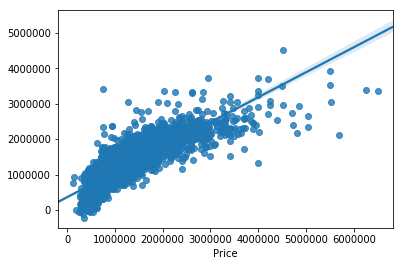

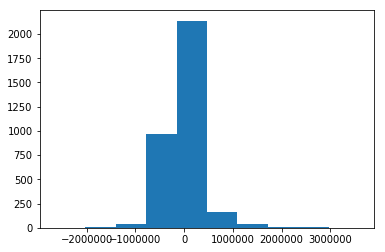

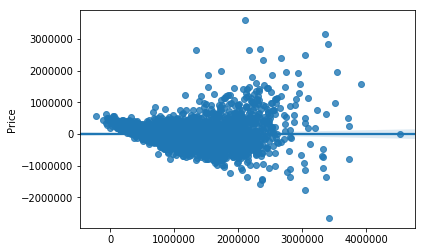

In [24]:
#Evaluate performance of regression model 
sns.regplot(actual, predicted)
plt.show()

plt.hist(residual)
plt.show()

sns.regplot(predicted, residual)
plt.show()

In [25]:
#norm = np.random.normal(0,1,len(residual))
#norm.sort()

#residual.sort()
#plt.scatter(norm, residual)
#plt.show()


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Plot of Actual vs. Predicted Sales Prices: Fold 1


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


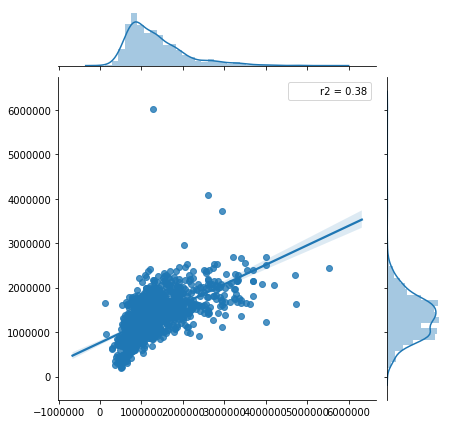

Plot of Actual vs. Predicted Sales Prices: Fold 2


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


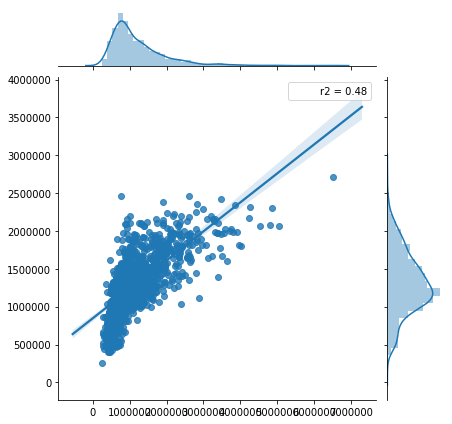

Plot of Actual vs. Predicted Sales Prices: Fold 3


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


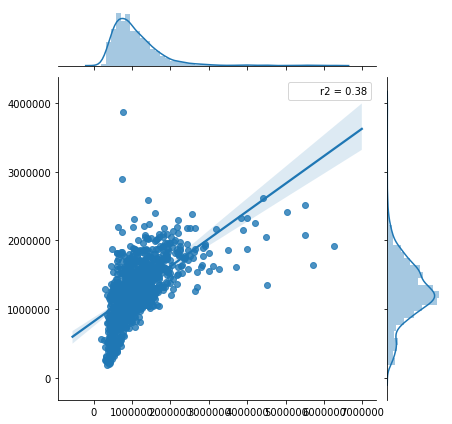

In [26]:
#Residuals are not normal..but let's test this model using k-fold cross-validation to determine if we want to use it
from sklearn import cross_validation

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

test_no = 1
kf = cross_validation.KFold(X.shape[0], n_folds=3)
for train, test in kf:
    x_train, x_test = X.values[train], X.values[test]
    y_train, y_test = Y.values[train], Y.values[test]
    #Use regr model defined above
    pred = regr.fit(x_train, y_train).predict(x_test)
    print('Plot of Actual vs. Predicted Sales Prices: Fold', test_no)
    sns.jointplot(y_test, pred, kind="reg", stat_func=r2)
    plt.show()
    test_no = test_no + 1
    
###### KEVIN'S THOUGHTS HERE?? #######
#when we do cross-validation with regression (linear or KNN) - do we train for each fold? 
#or do we use the original model and test it on different folds?
#Also, first linear model seems to allow NANs, but not the second one. What are your thoughts on dropping NANs here? Data went
#from ~9K to ~3K

In [27]:
df4.head()

,Bedrooms,Bathrooms,Latitude,Landsize,BuildingArea,Car,suburb_Aberfeldie,suburb_Airport West,suburb_Albert Park,suburb_Albion,...,suburb_Watsonia,suburb_West Footscray,suburb_West Melbourne,suburb_Williamstown,suburb_Williamstown North,suburb_Windsor,suburb_Yallambie,suburb_Yarraville,type_t,type_u
2,2.0,1.0,-37.8079,156.0,79.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,-37.8093,134.0,150.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,1.0,-37.8072,120.0,142.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,4.0,2.0,-37.8024,245.0,210.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2.0,1.0,-37.8060,256.0,107.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


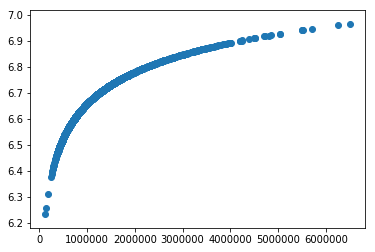

In [28]:
#The linear regression model we built here is not great...

#Hence I will attempt to improve this with a box-cox transformation

from scipy.stats import boxcox
from scipy.stats import boxcox_normmax

#regular box-cox was erroring out (stated that zeros were included, but they are not) - see discussison here: https://github.com/scipy/scipy/issues/6873
lambda_max = boxcox_normmax(df3['Price'], brack=(-1.99, 1.99),  method='mle')
bc = boxcox(df3['Price'], lambda_max)

plt.scatter(df3['Price'], bc)
plt.show()

df4['Price_BC_Transform'] = bc

In [29]:
#Transform the predictors to try to create a linear relationship with the (transformed) target var

#Some homes had 0 bedrooms, so add 1 to all datapoints, and see what the log transform looks like
df4['Bedrooms_Plus_1'] = df4['Bedrooms'] + 1
df4['Bedrooms_Plus_1_Log'] = np.log(df4['Bedrooms_Plus_1'])
df4['Bedrooms_Sqrt'] = np.sqrt(df4['Bedrooms'])

df4['Bathrooms_Log'] = np.log(df4['Bathrooms'])
df4['Bathrooms_Sqrt'] = np.sqrt(df4['Bathrooms'])

df4['Landsize_Log'] = np.log(df4['Landsize'])
df4['Landsize_Sqrt'] = np.sqrt(df4['Landsize'])

df4['BuildingArea_Log'] = np.log(df4['BuildingArea'])
df4['BuildingArea_Sqrt'] = np.sqrt(df4['BuildingArea'])

df4['Car_Plus_1'] = df4['Car'] + 1
df4['Car_Plus_1_Log'] = np.log(df4['Car_Plus_1'])
df4['Car_Sqrt'] = np.sqrt(df4['Car'])

#Take abs value of latitude so log is a real number
df4['Latitude_Log'] = np.log(abs(df4['Latitude']))
df4['Latitude_Sqrt'] = np.sqrt(abs(df4['Latitude']))


#Add suburb & type back to df4 to build the new linear model & select relevant params

df4['Suburb'] = df3['Suburb']
df4['Type'] = df3['Type']

In [30]:
#Create new linear model and only keep relevant parameters...

#Suburb & dummy variables will be included 

linear_formula = 'Price_BC_Transform ~ Suburb + Type + Bedrooms_Plus_1_Log + Bedrooms_Sqrt + Bathrooms_Log + Bathrooms_Sqrt + Landsize_Log + Landsize_Sqrt + BuildingArea_Log + BuildingArea_Sqrt + Car_Plus_1_Log + Car_Sqrt + Latitude_Log + Latitude_Sqrt'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df4).fit()

In [31]:
lm.pvalues

Intercept                        8.722063e-08
Suburb[T.Aberfeldie]             8.357042e-01
Suburb[T.Airport West]           2.697412e-02
Suburb[T.Albert Park]            9.605074e-06
Suburb[T.Albion]                 1.084847e-19
Suburb[T.Alphington]             7.964203e-01
Suburb[T.Altona]                 4.963622e-12
Suburb[T.Altona North]           1.247282e-30
Suburb[T.Armadale]               5.419704e-02
Suburb[T.Ascot Vale]             3.394028e-04
Suburb[T.Ashburton]              4.308614e-02
Suburb[T.Ashwood]                1.785538e-06
Suburb[T.Avondale Heights]       4.872532e-13
Suburb[T.Balaclava]              2.557148e-01
Suburb[T.Balwyn]                 2.716426e-01
Suburb[T.Balwyn North]           7.176438e-01
Suburb[T.Bellfield]              3.671763e-06
Suburb[T.Bentleigh]              1.059563e-01
Suburb[T.Bentleigh East]         1.247156e-03
Suburb[T.Box Hill]               1.518585e-03
Suburb[T.Braybrook]              1.307916e-26
Suburb[T.Brighton]               9

In [32]:
#Lets stick with the log values for our model
#Drop Suburb & Type, along with Sqrt fields from df4 & re-run...

df4.drop(['Suburb', 'Type', 'Bedrooms_Sqrt', 'Bathrooms_Sqrt', 'Landsize_Sqrt', 'Latitude_Sqrt', 'BuildingArea_Sqrt', 'Car_Sqrt', 'Bedrooms_Plus_1', 'Car_Plus_1'], axis = 1, inplace = True)

#Move the transformed price to a new df and drop it from df4 before we build the new model (otherwise r2 = 1... and model is fake)

df5 = pd.DataFrame(df4['Price_BC_Transform'])

df4.drop(['Price_BC_Transform'], axis = 1, inplace = True)

In [33]:
df4.drop(['Bedrooms', 'Bathrooms', 'Latitude', 'Landsize', 'BuildingArea', 'Car'], axis = 1, inplace = True)

In [34]:
df4.head()

,suburb_Aberfeldie,suburb_Airport West,suburb_Albert Park,suburb_Albion,suburb_Alphington,suburb_Altona,suburb_Altona North,suburb_Armadale,suburb_Ascot Vale,suburb_Ashburton,...,suburb_Yallambie,suburb_Yarraville,type_t,type_u,Bedrooms_Plus_1_Log,Bathrooms_Log,Landsize_Log,BuildingArea_Log,Car_Plus_1_Log,Latitude_Log
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.098612,0.000000,5.049856,4.369448,0.000000,3.632518
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.386294,0.693147,4.897840,5.010635,0.000000,3.632555
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.386294,0.000000,4.787492,4.955827,1.098612,3.632500
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.609438,0.693147,5.501258,5.347108,0.000000,3.632373
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.098612,0.000000,5.545177,4.672829,1.098612,3.632468


In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X = df4
Y = df5['Price_BC_Transform']

#X = df3[['Suburb', 'Type_Num', 'Bedrooms', 'Bathrooms', 'Distance',  'Latitude', 'Landsize', 'BuildingArea', 'Car']]
#Y = df3['Price']

regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 4.85336943e-03 -6.49602436e-02  5.03686859e-02 -1.31204852e-01
  3.17873580e-03 -1.04806765e-01 -1.48533377e-01  2.41649337e-02
 -3.77188032e-02 -3.61726056e-02 -7.52728822e-02 -1.03216107e-01
 -3.33300418e-02  1.96245153e-02  9.84667261e-03 -1.09209135e-01
 -8.40097737e-02 -1.11877168e-01 -2.79389571e-02 -1.33923682e-01
 -5.39123319e-03 -6.01862080e-02 -1.63364060e-01 -1.74631449e-02
 -8.81753123e-03 -4.94353592e-02 -5.99959725e-02 -8.61926308e-03
 -6.54817704e-02  4.29225728e-03  2.35141234e-02  5.15938895e-03
  6.59872026e-02 -7.29866961e-02 -3.24295383e-01 -1.07483819e-01
 -6.85846071e-02 -6.61355912e-02 -9.75370274e-02  5.31514350e-03
 -4.93377419e-02 -7.04919709e-02 -2.80045713e-02 -1.79299229e-02
 -3.40059412e-02  1.58619402e-02  1.86892662e-01 -4.32010824e-02
 -3.50419629e-02 -8.98427895e-03 -2.94194039e-02 -5.10766737e-02
 -3.92394220e-03 -1.11272702e-01  1.74076866e-02  1.18043460e-02
 -2.35210321e-02 -7.79290103e-02 -5.99625130e-02 -5.92323412e-02
 -1.8235

In [36]:
actual = df5['Price_BC_Transform']
predicted = regr.predict(X).ravel()
residual = actual - predicted

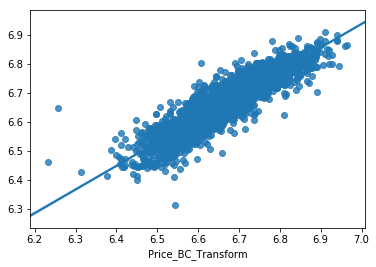

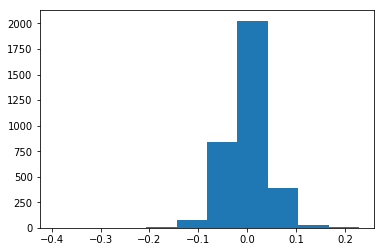

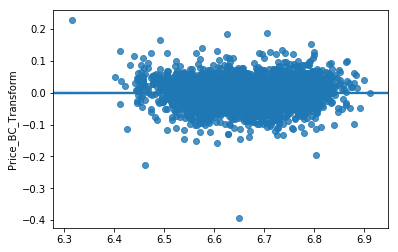

In [37]:
sns.regplot(actual, predicted)
plt.show()

plt.hist(residual)
plt.show()

sns.regplot(predicted, residual)
plt.show()

Plot of Actual vs. Predicted Sales Prices (Transformed): Fold 1


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


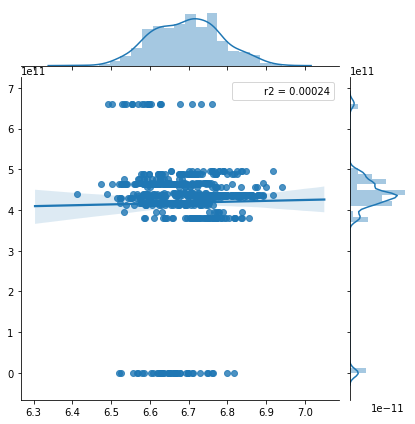

Plot of Actual vs. Predicted Sales Prices (Transformed): Fold 2


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


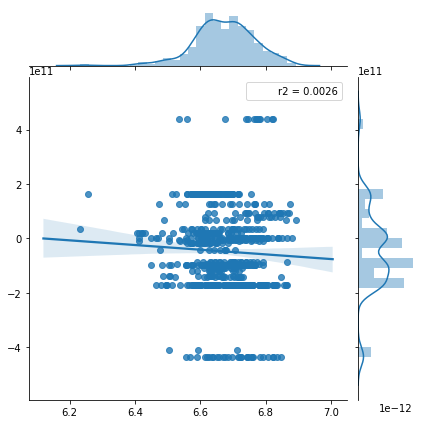

Plot of Actual vs. Predicted Sales Prices (Transformed): Fold 3


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


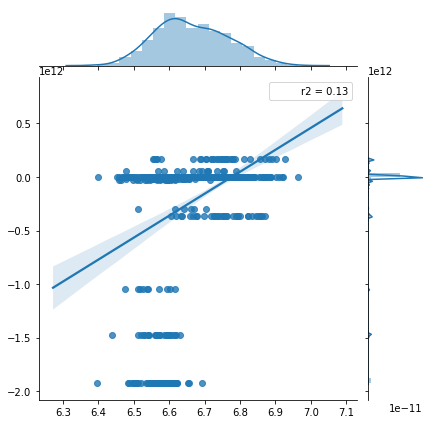

Plot of Actual vs. Predicted Sales Prices (Transformed): Fold 4


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


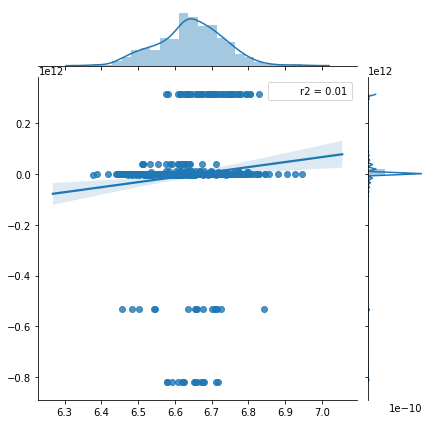

Plot of Actual vs. Predicted Sales Prices (Transformed): Fold 5


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


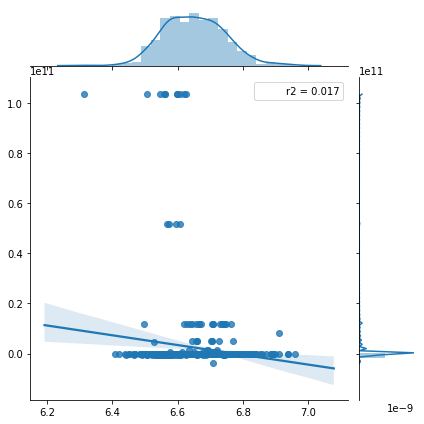

In [38]:
#let's test this model using k-fold cross-validation to determine if we want to use it
from sklearn import cross_validation

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

test_no = 1
kf = cross_validation.KFold(X.shape[0], n_folds=5)
for train, test in kf:
    x_train, x_test = X.values[train], X.values[test]
    y_train, y_test = Y.values[train], Y.values[test]
    #Use regr model defined above
    pred = regr.fit(x_train, y_train).predict(x_test)
    print('Plot of Actual vs. Predicted Sales Prices (Transformed): Fold', test_no)
    sns.jointplot(y_test, pred, kind="reg", stat_func=r2)
    plt.show()
    test_no = test_no + 1

In [39]:
#Now let's focus on the KNN model. Let's start the KNN model based on our df2 set
df2.head()

,Suburb,Type,Bedrooms,Bathrooms,Distance,Latitude,Longitude,Landsize,BuildingArea,Car,Price
2,Abbotsford,h,2.0,1.0,2.5,-37.8079,144.9934,156.0,79.0,0.0,1035000.0
4,Abbotsford,h,3.0,2.0,2.5,-37.8093,144.9944,134.0,150.0,0.0,1465000.0
6,Abbotsford,h,3.0,1.0,2.5,-37.8072,144.9941,120.0,142.0,2.0,1600000.0
11,Abbotsford,h,4.0,2.0,2.5,-37.8024,144.9993,245.0,210.0,0.0,1876000.0
14,Abbotsford,h,2.0,1.0,2.5,-37.8060,144.9954,256.0,107.0,2.0,1636000.0


In [40]:
#KNN can't use categorical variables, and the variables need to be normalized

#For KNN, try transforming the lat & long variables to z-scores (std devs from mean), along w/ bedrooms, bathrooms, landsize & building area
#For KNN, try transforming the lat & long variables to min-max scaling, along w/ bedrooms, bathrooms, landsize & building area

knn_df = df2[['Bedrooms', 'Bathrooms', 'Latitude', 'Longitude', 'Landsize', 'BuildingArea', 'Car']]

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(knn_df)
df_std = std_scale.transform(knn_df)

minmax_scale = preprocessing.MinMaxScaler().fit(knn_df)
df_minmax = minmax_scale.transform(knn_df)

KNN Plot of Actual vs. Predicted Sales Prices (Z-scores)


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


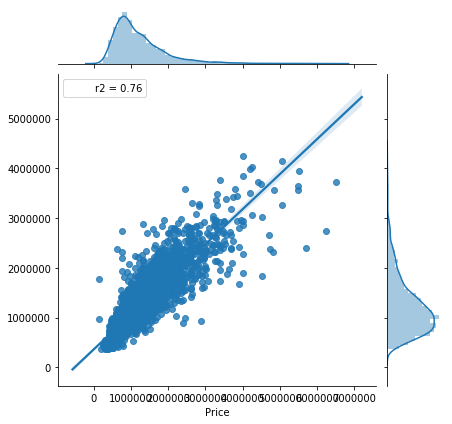

In [41]:
## Your model here.
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=7)

#####IF I CHANGE TO n-neighbors = 1 then r^2 becomes 1.... WHY? #######

X = pd.DataFrame(df_std)
Y = df3['Price']
knn.fit(X, Y)

knn_pred = knn.predict(X).ravel()
knn_actual = Y


print('KNN Plot of Actual vs. Predicted Sales Prices (Z-scores)')
sns.jointplot(knn_actual, knn_pred, kind="reg", stat_func=r2)
#Lplt.show()

KNN Plot of Actual vs. Predicted Sales Prices: Fold 1


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


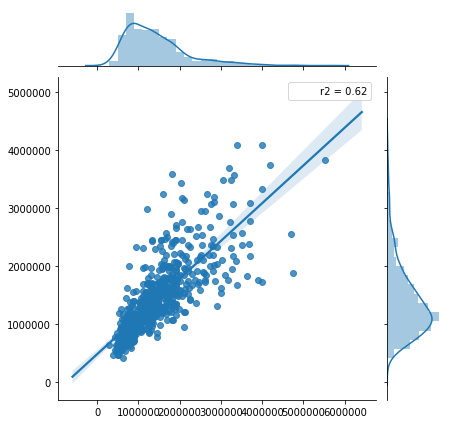

KNN Plot of Actual vs. Predicted Sales Prices: Fold 2


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


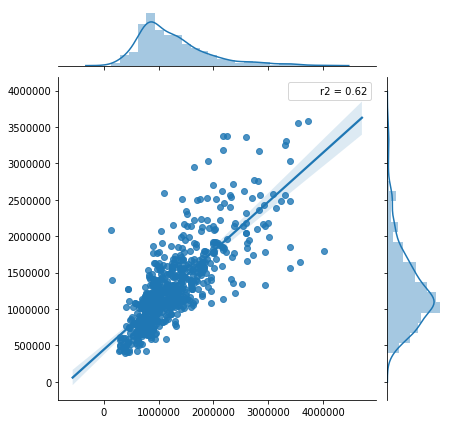

KNN Plot of Actual vs. Predicted Sales Prices: Fold 3


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


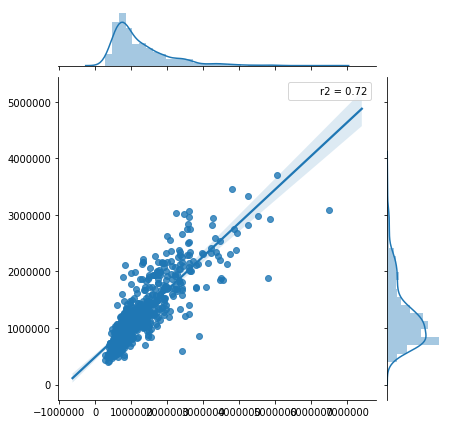

KNN Plot of Actual vs. Predicted Sales Prices: Fold 4


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


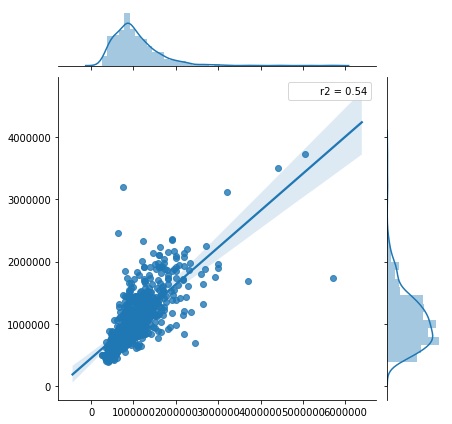

KNN Plot of Actual vs. Predicted Sales Prices: Fold 5


/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


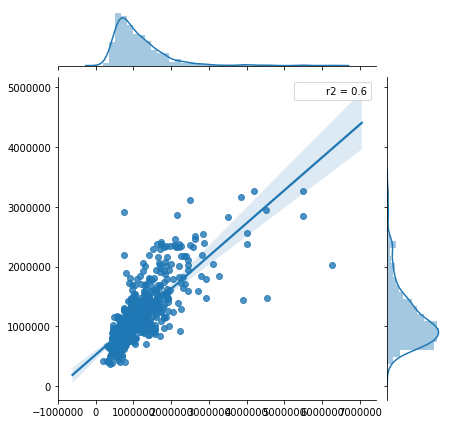

In [42]:
#Lets do some cross-validation of the KNN model

from sklearn import cross_validation


test_no = 1
kf = cross_validation.KFold(X.shape[0], n_folds=5)
for train, test in kf:
    x_train, x_test = X.values[train], X.values[test]
    y_train, y_test = Y.values[train], Y.values[test]
    #Use regr model defined above
    pred = knn.fit(x_train, y_train).predict(x_test)
    print('KNN Plot of Actual vs. Predicted Sales Prices: Fold', test_no)
    sns.jointplot(y_test, pred, kind="reg", stat_func=r2)
    plt.show()
    test_no = test_no + 1

In [40]:
#Other methods we could potentially use to improve KNN:

#Reduce feature set (potentially w/ PCA), play around w/ num neighbors, weighting by distance

In [41]:
#Limitation of KNN - sometimes we can't use categorical variables at all (although you can creatively convert sometimes, 
#like suburb to latitude/longitude coordiates, maybe)

#Difficult to maintain assumption of equal units in the predictor variables for KNN... eg beds/baths/lat/long. Have to standardize

#Shortcomings of regression model: